# Checking requisites

In [117]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost

# Importing Libraries

In [118]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV





In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Uploading data

In [120]:
client = pd.read_csv('./data/base_clientes.csv')
churn = pd.read_csv('./data/base_hist_churn.csv')
price = pd.read_csv('./data/base_precos.csv')

# Exploratory Data Analysis and Cleaning

## Initial descriptive analysis

In [121]:
client.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321


In [122]:
client.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,2.012000e+04,2.012000e+04,2.012000e+04,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,...,19970.000000,19970.000000,19970.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000
mean,NaN,1.949648e+05,3.196017e+04,1.953380e+04,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,...,0.135960,0.052889,43.543557,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284
std,NaN,6.754792e+05,1.782284e+05,8.087283e+04,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,...,0.026286,0.048587,5.173667,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836
min,NaN,-1.252760e+05,-4.275000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000
25%,NaN,5.832750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000
50%,NaN,1.533450e+04,0.000000e+00,9.060000e+02,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,...,0.142881,0.086163,44.311378,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000
75%,NaN,5.035500e+04,0.000000e+00,4.119500e+03,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,...,0.146348,0.098837,44.311378,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000


In [123]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [124]:
price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000
mean,0.141013,0.054352,0.030709,43.333166,10.699025,6.458055
std,0.025113,0.050004,0.036324,5.403902,12.853889,7.783320
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101674,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [125]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


In [126]:
churn.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [127]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [128]:

client.shape

(20120, 32)

In [129]:
client.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

<Axes: xlabel='Features', ylabel='Missing values (%)'>

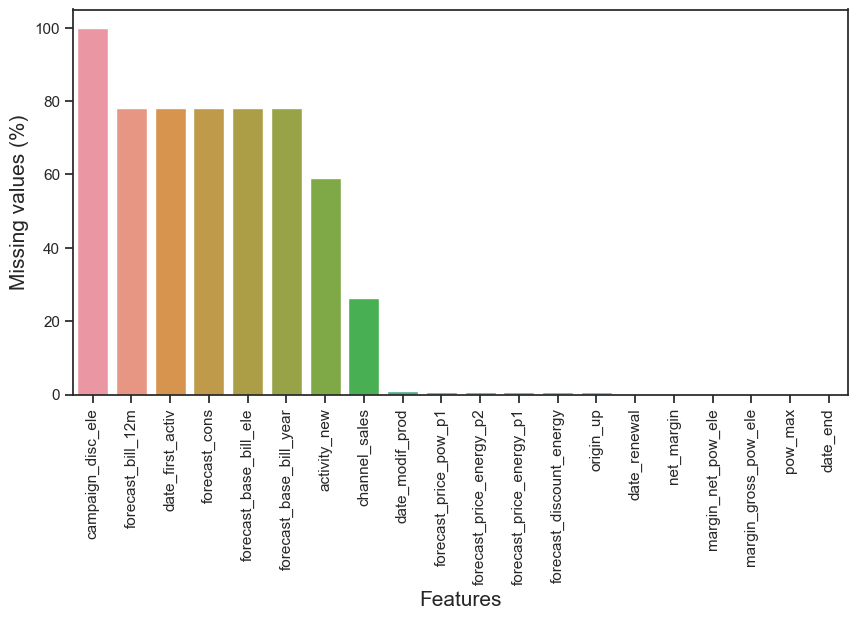

In [130]:
nan_count = ((client.isnull().sum()/client.shape[0])*100).sort_values(ascending=False)
nan_count = nan_count[nan_count>0]
plt.figure(figsize=(10,5))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing values (%)', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=nan_count.index, y=nan_count.values)

Campaign_disc_ele is 100% empty!

Removing it and the others 5 features with high null percentage...

In [131]:
client.drop(columns=["campaign_disc_ele", "date_first_activ",
 "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

In [132]:
client[nan_count.index[7:]].nunique()

channel_sales                   7
date_modif_prod              2423
forecast_price_pow_p1          48
forecast_price_energy_p2      439
forecast_price_energy_p1      658
forecast_discount_energy       14
origin_up                       6
date_renewal                  420
net_margin                  15761
margin_net_pow_ele           3338
margin_gross_pow_ele         3304
pow_max                       985
date_end                      372
dtype: int64

In [133]:
client[nan_count.index[7:]].isnull().sum()

channel_sales               5274
date_modif_prod              202
forecast_price_pow_p1        150
forecast_price_energy_p2     150
forecast_price_energy_p1     150
forecast_discount_energy     150
origin_up                    114
date_renewal                  44
net_margin                    18
margin_net_pow_ele            15
margin_gross_pow_ele          15
pow_max                        4
date_end                       2
dtype: int64

Filling missing dates with the next row.

In [134]:
client.loc[client["date_modif_prod"].isnull(),"date_modif_prod"] = client["date_modif_prod"].value_counts().index[0]
client.loc[client["date_end"].isnull(),"date_end"] = client["date_end"].value_counts().index[0]
client.loc[client["date_renewal"].isnull(),"date_renewal"] = client["date_renewal"].value_counts().index[0]

In [135]:
df = pd.merge(client, churn, on=['id'])


posx and posy should be finite values
posx and posy should be finite values


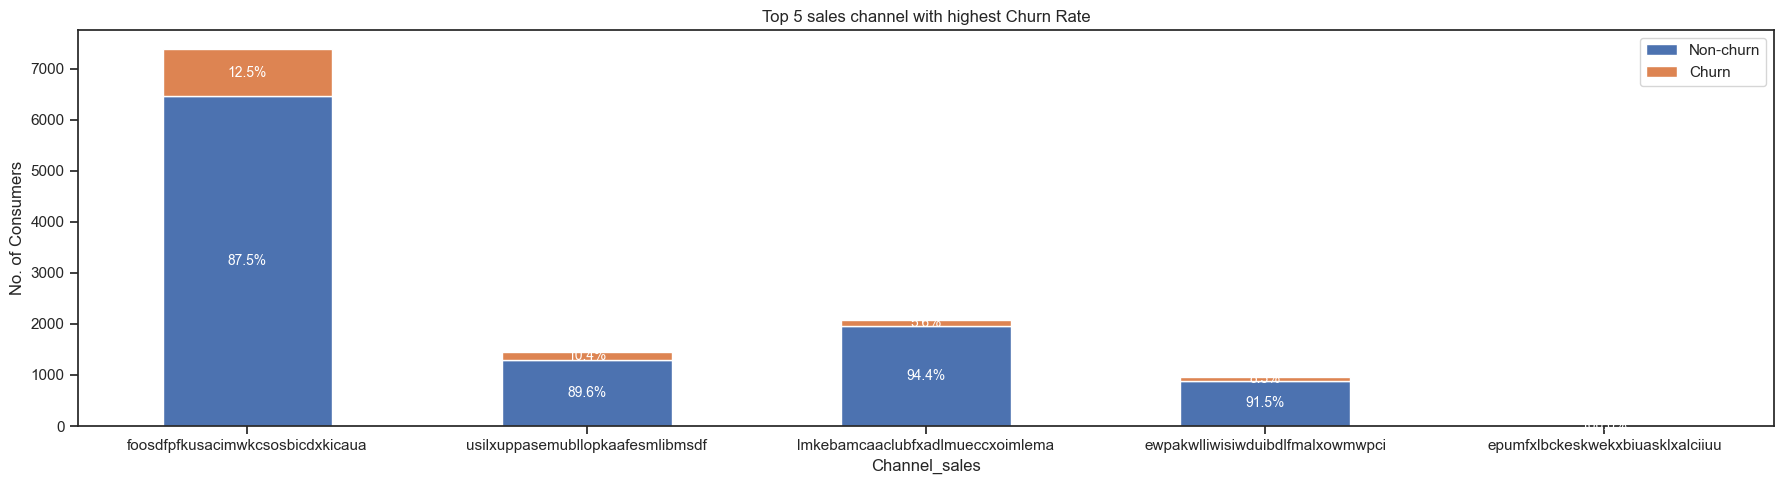

In [136]:
sales = df[["channel_sales", "churn", "id"]].groupby([
    "channel_sales", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
sales_percentage = (sales.div(sales.sum(axis=1), axis=0) * 100)

# Plotting
ax = sales.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Top 5 sales channel with highest Churn Rate")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in sales.index}

# Add percentage annotations to each bar
for channel in sales.index:
    for col in sales.columns:
        value = sales.loc[channel, col]
        percentage = sales_percentage.loc[channel, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[channel] + value/2
        ax.text(sales.index.get_loc(channel), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[channel] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.tight_layout()
plt.show()

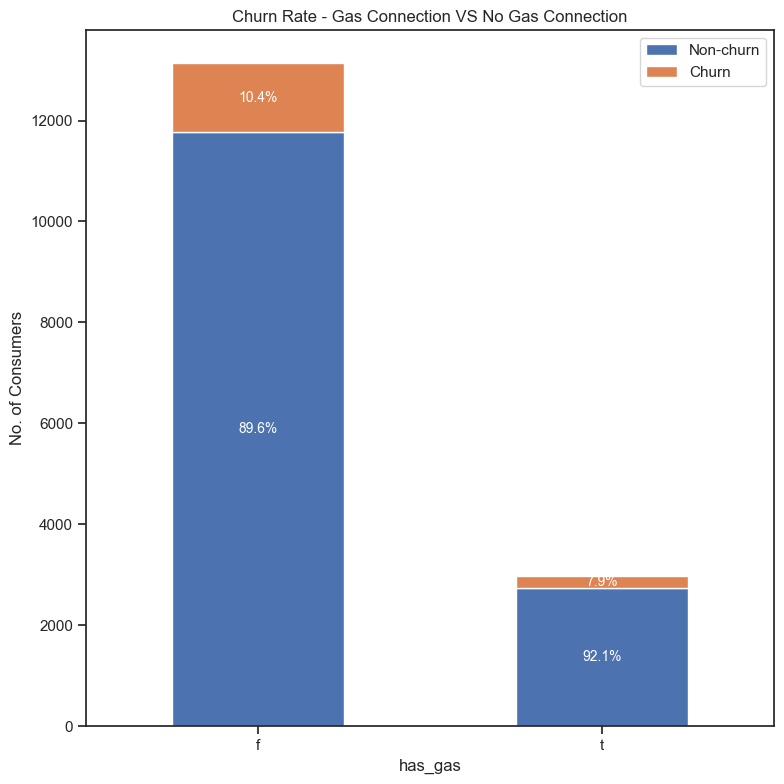

In [137]:
cons_12m = df[["has_gas", "churn", "id"]].groupby([
    "has_gas", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(8, 8), stacked=True, rot=0, title="Churn Rate - Gas Connection VS No Gas Connection")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for gas_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[gas_status, col]
        percentage = cons_12m_percentage.loc[gas_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[gas_status] + value/2
        ax.text(cons_12m.index.get_loc(gas_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[gas_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.tight_layout()
plt.show()


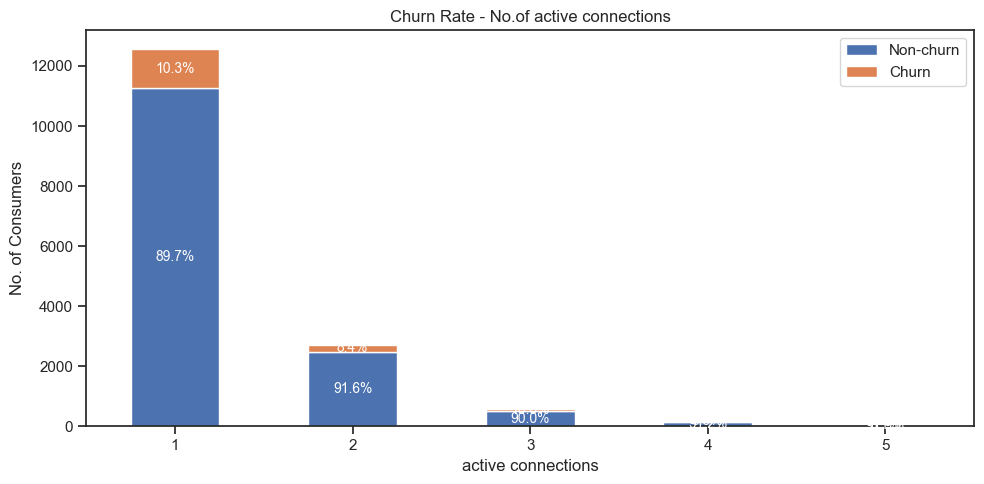

In [138]:
cons_12m = df[["nb_prod_act", "churn", "id"]].groupby([
    "nb_prod_act", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(10, 5), stacked=True, rot=0, title="Churn Rate - No.of active connections")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for conn_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[conn_status, col]
        percentage = cons_12m_percentage.loc[conn_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[conn_status] + value/2
        ax.text(cons_12m.index.get_loc(conn_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[conn_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.tight_layout()
plt.show()

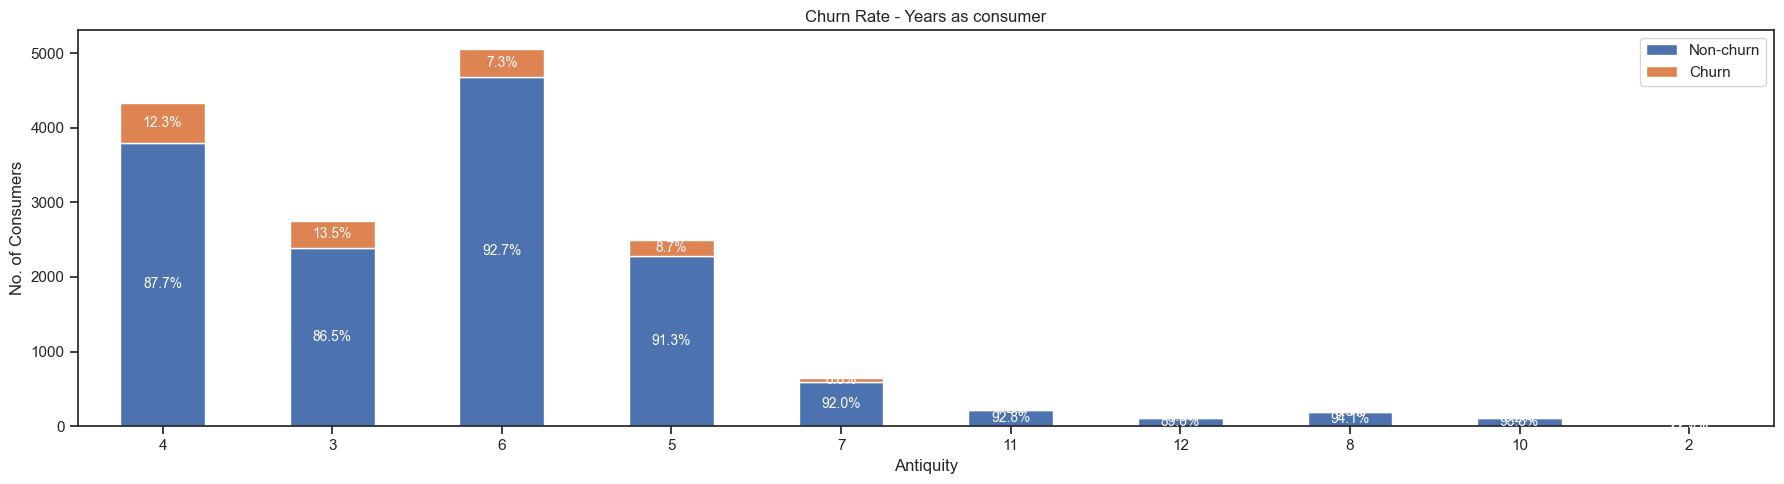

In [139]:
cons_12m = df[["num_years_antig", "churn", "id"]].groupby([
    "num_years_antig", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:10]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Churn Rate - Years as consumer")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for year in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[year, col]
        percentage = cons_12m_percentage.loc[year, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[year] + value/2
        ax.text(cons_12m.index.get_loc(year), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[year] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.tight_layout()
plt.show()

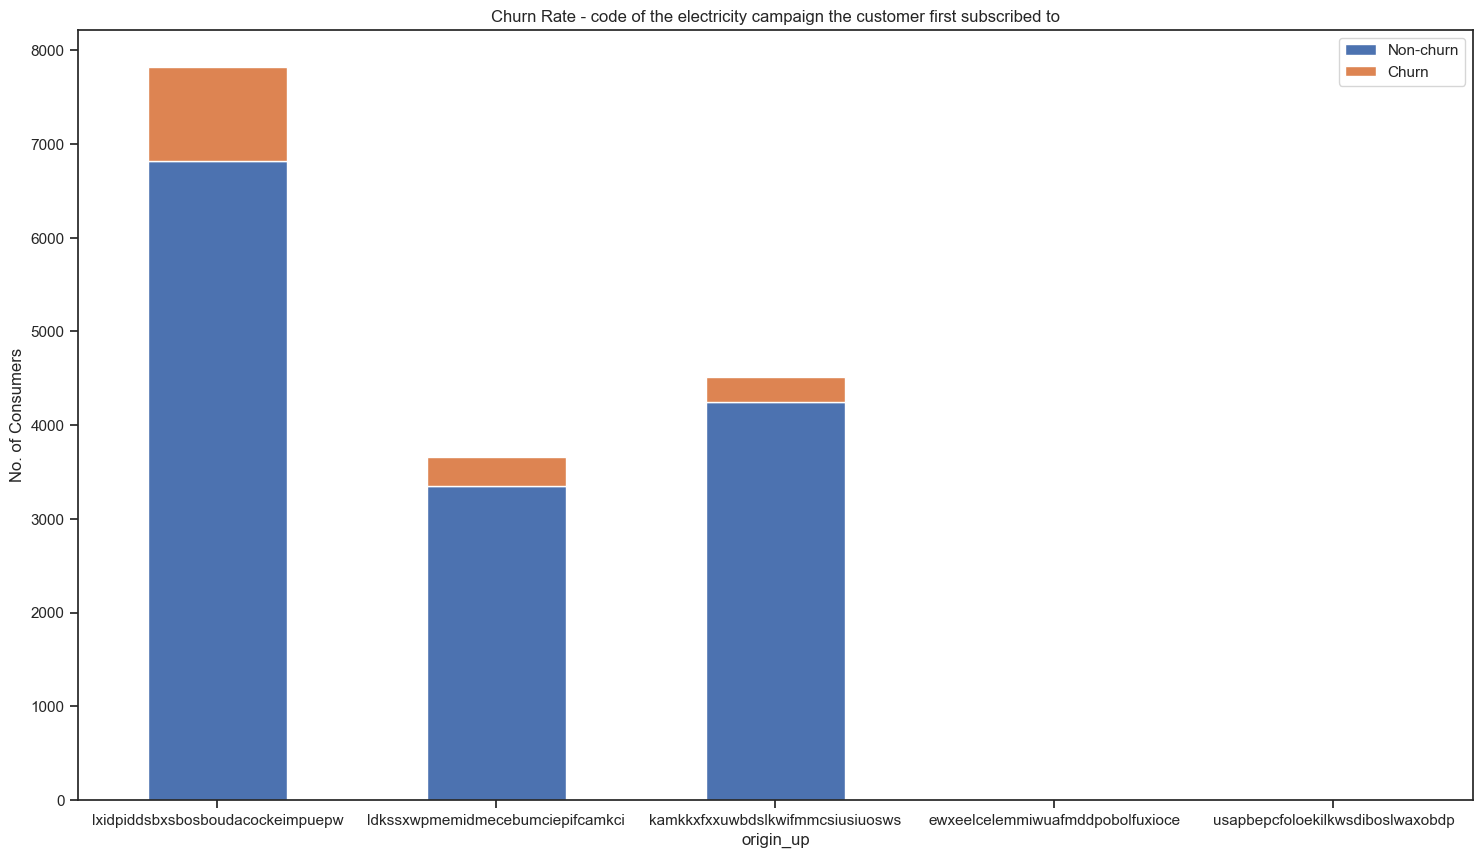

In [140]:
cons_12m = df[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.show()

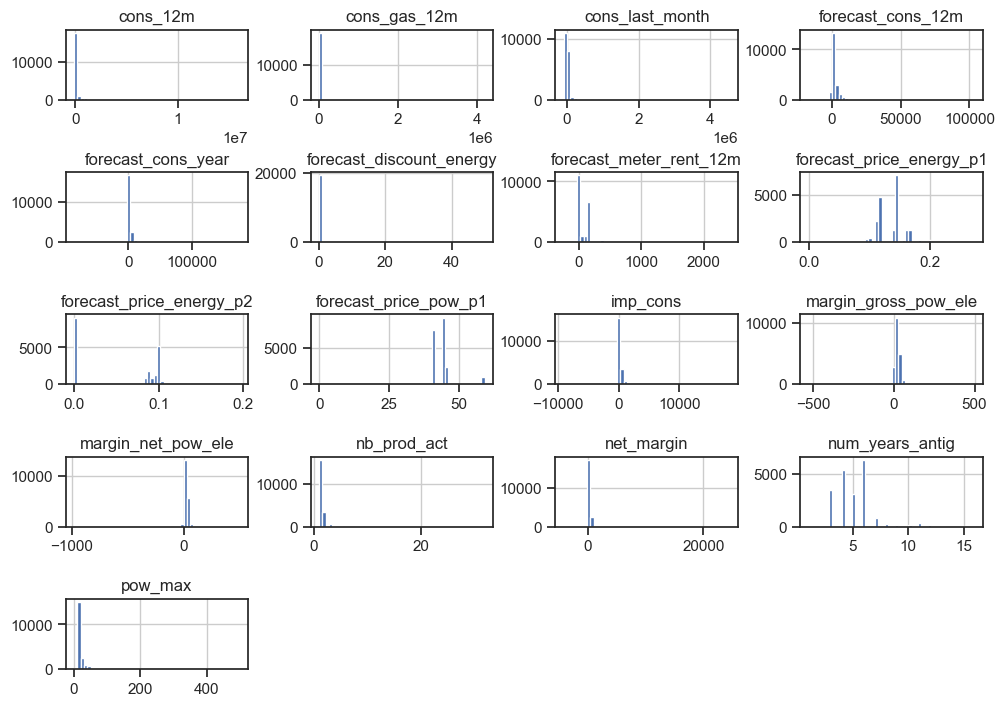

In [141]:
client.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

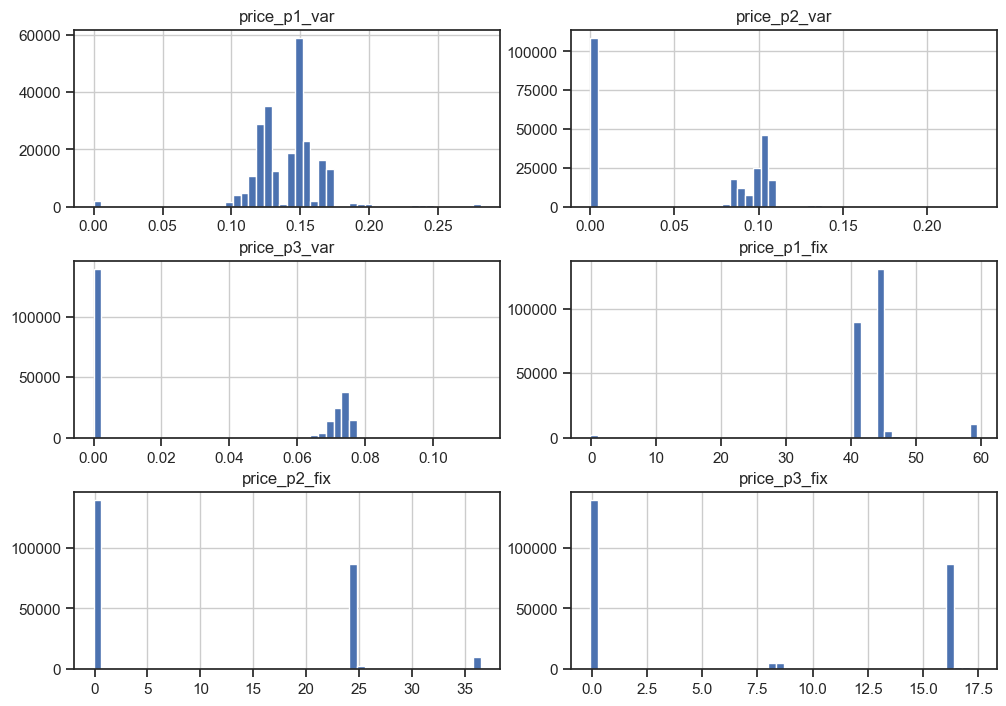

In [142]:
price.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

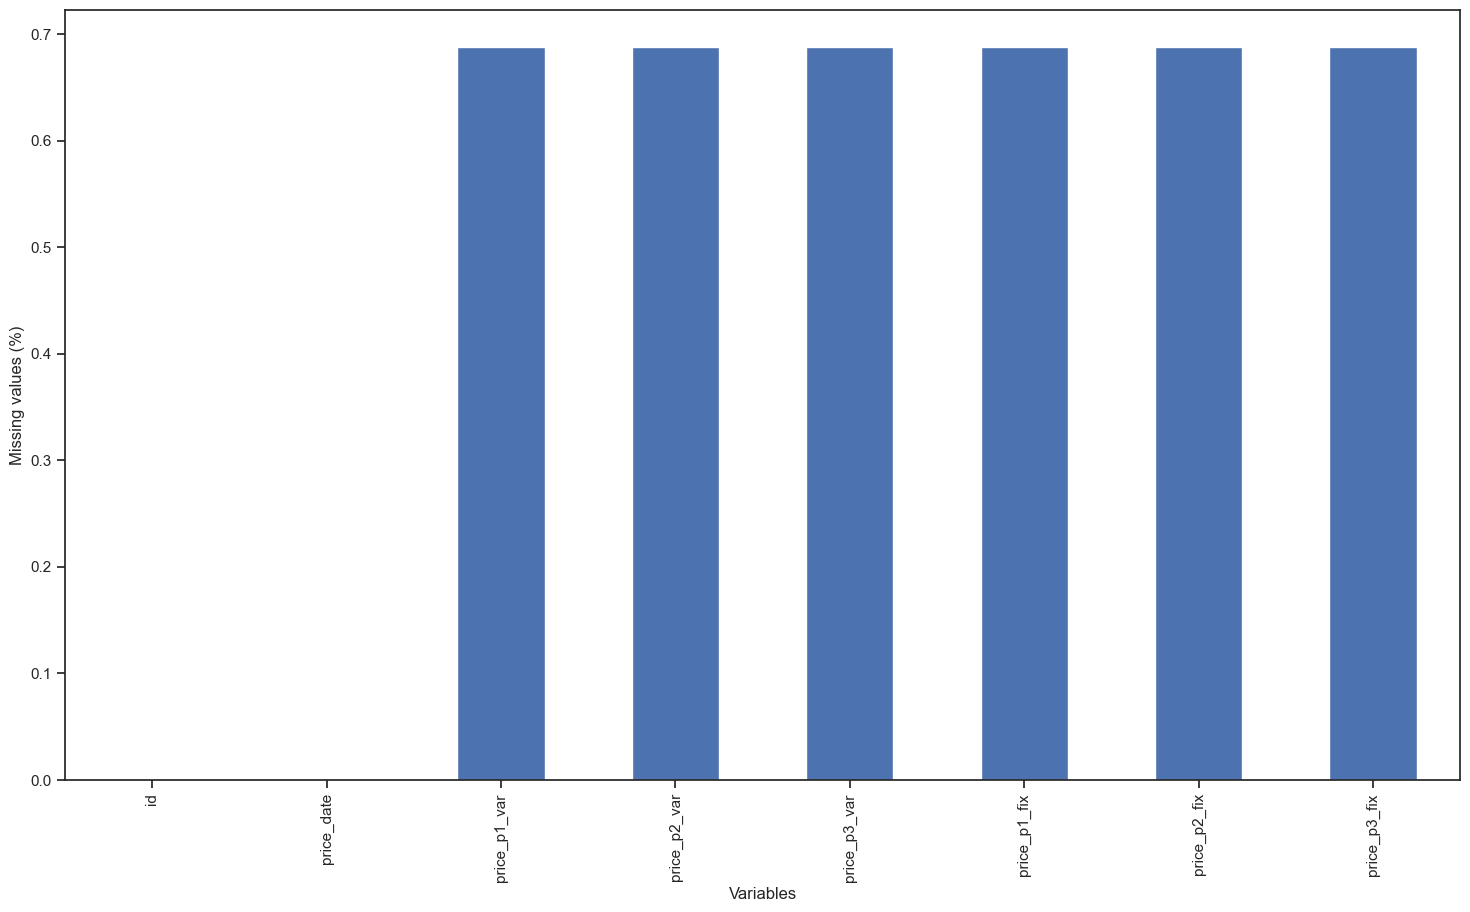

In [143]:
missing_data_percentage = price.isnull().sum()/len(price.index)*100
missing_data_percentage.plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [144]:
price.loc[price["price_p1_var"].isnull(),"price_p1_var"] = price["price_p1_var"].median()
price.loc[price["price_p2_var"].isnull(),"price_p2_var"] = price["price_p2_var"].median()
price.loc[price["price_p3_var"].isnull(),"price_p3_var"] = price["price_p3_var"].median()
price.loc[price["price_p1_fix"].isnull(),"price_p1_fix"] = price["price_p1_fix"].median()
price.loc[price["price_p2_fix"].isnull(),"price_p2_fix"] = price["price_p2_fix"].median()
price.loc[price["price_p3_fix"].isnull(),"price_p3_fix"] = price["price_p3_fix"].median()

In [145]:
df["date_activ"].head(3)

0    07/11/2018
1    15/06/2019
2    21/08/2015
Name: date_activ, dtype: object

In [146]:
error_dates = []

for idx, date_str in enumerate(df["date_renewal"]):
    try:
        pd.to_datetime(date_str, format='%d/%m/%Y')
    except ValueError:
        error_dates.append((idx, date_str))

print(error_dates)

[]


Formatting dates in 'df'

In [147]:
#from datetime import datetime, timedelta

def safe_date_conversion(date_str, format='%d/%m/%Y'):
    while True:
        try:
            return pd.to_datetime(date_str, format=format)
        except ValueError:
            day, month, year = map(int, date_str.split('/'))
            if day > 1:
                day -= 1
                date_str = f"{day:02}/{month:02}/{year}"
            else:
                # If day is already 1, then we should break to avoid infinite loops
                return np.nan

# Applying the safe conversion for each of the three columns
df["date_activ"] = df["date_activ"].apply(lambda x: safe_date_conversion(x))
df["date_end"] = df["date_end"].apply(lambda x: safe_date_conversion(x))
df["date_modif_prod"] = df["date_modif_prod"].apply(lambda x: safe_date_conversion(x))
df["date_renewal"] = df["date_modif_prod"].apply(lambda x: safe_date_conversion(x))

Formatting dates in 'price'

In [148]:
price["price_date"] = pd.to_datetime(price["price_date"], format='%d/%m/%Y')

In [149]:
price.describe()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,241238,241238.000000,241238.000000,241238.000000,241238.000000,241238.000000,241238.000000
mean,2021-06-16 13:00:01.223687936,0.141048,0.054566,0.030497,43.339595,10.625359,6.413590
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,2021-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2021-07-01 00:00:00,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,2021-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2021-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025030,0.049898,0.036288,5.385819,12.840078,7.774841


In [150]:
price[(price.price_p1_fix < 0) | (price.price_p2_fix < 0) | (price.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
15493,dbd52df6910391dab4c3b0503a57fbcd,2021-01-01,0.126676,0.104552,0.070810,-0.162916,-0.097749,-0.065166
19003,a4e86d4fd81e31ccbfc2aae488e8aa3b,2021-09-01,0.122871,0.104727,0.076901,-0.162912,-0.097752,-0.065172
22938,2350d3669e27c059973369bc55d45d2b,2021-04-01,0.124820,0.102239,0.070381,-0.162916,-0.097749,-0.065166
71374,951d99fe07ca94c2139f43bc37095139,2021-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
76586,f7bdc6fa1067cd26fd80bfb9f3fca28f,2021-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
146811,9b523ad5ba8aa2e524dcda5b3d54dab2,2021-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
161703,cfd098ee6c567eb32374c77d20571bc7,2021-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
166703,51d7d8a0bf6b8bd94f8c1de7942c66ea,2021-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
174055,decc0a647016e183ded972595cd2b9fb,2021-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
176997,cc214d7c05de3ee17a7691e274ac488e,2021-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172


In [151]:
price.loc[price["price_p1_fix"] < 0,"price_p1_fix"] = price["price_p1_fix"].median()
price.loc[price["price_p2_fix"] < 0,"price_p2_fix"] = price["price_p2_fix"].median()
price.loc[price["price_p3_fix"] < 0,"price_p3_fix"] = price["price_p3_fix"].median()


## Identification of numerical and categorical columns

In [152]:
numerica_cols = ["cons_12m", "cons_gas_12m", "cons_last_month", "date_activ", "date_end", "date_first_activ", "date_modif_prod", "date_renewal", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2", "forecast_price_pow_p1", "imp_cons", "margin_gross_pow_ele", "margin_net_pow_ele", "nb_prod_act", "net_margin", "num_years_antig", "pow_max"]
categorica_cols = ["id", "activity_new", "campaign_disc_ele", "channel_sales", "has_gas", "origin_up", "churn"]

print('Colunas numéricas:', numerica_cols)
print('Colunas categóricas:', categorica_cols)

Colunas numéricas: ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']
Colunas categóricas: ['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'has_gas', 'origin_up', 'churn']


# Descriptive analysis after data processing

In [153]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.609600e+04,1.609600e+04,1.609600e+04,16096,16096,16096,16096,16096.000000,16096.000000,15970.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2017-01-16 18:51:31.848906752,2022-07-27 13:19:31.968190976,2018-12-25 16:17:33.876739584,2018-12-25 16:17:33.876739584,2370.555949,1907.347229,0.991547,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2006-07-25 00:00:00,2012-08-26 00:00:00,2006-07-25 00:00:00,2006-07-25 00:00:00,-16689.260000,-85627.000000,0.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,2016-01-12 00:00:00,2022-04-28 00:00:00,2016-08-20 00:00:00,2016-08-20 00:00:00,513.230000,0.000000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,2017-03-04 00:00:00,2022-07-30 00:00:00,2019-07-10 00:00:00,2019-07-10 00:00:00,1179.160000,378.000000,0.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2018-04-26 00:00:00,2022-10-31 00:00:00,2021-05-26 00:00:00,2021-05-26 00:00:00,2692.077500,1994.250000,0.000000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2020-09-01 00:00:00,2023-06-13 00:00:00,2022-01-29 00:00:00,2022-01-29 00:00:00,103801.930000,175375.000000,50.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000
std,6.795151e+05,1.775885e+05,8.235676e+04,NaN,NaN,NaN,NaN,4035.085664,5257.364759,5.160969,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796


# Graphs to visualize the relationship between the chosen variables

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


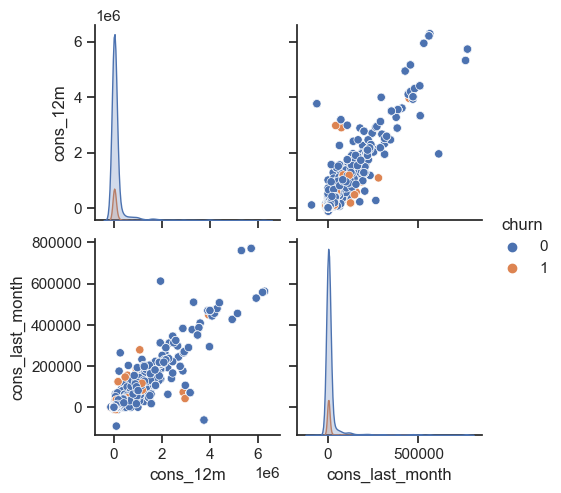

In [154]:
test_regressão = df[['cons_12m', 'cons_last_month','churn']]
teste = test_regressão['cons_12m'].idxmax()
df_without_high_cons = test_regressão.drop(teste)

sns.set(style="ticks")
sns.pairplot(df_without_high_cons, hue="churn")
plt.show()

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


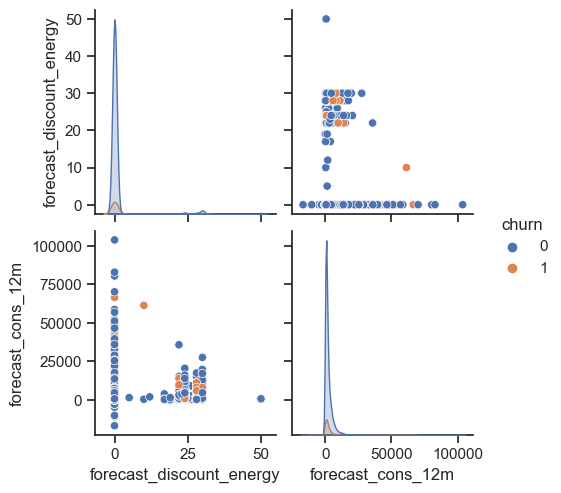

In [155]:
test_regressão = df[['forecast_discount_energy', 'forecast_cons_12m','churn']]

sns.set(style="ticks")
sns.pairplot(test_regressão, hue="churn")
plt.show()

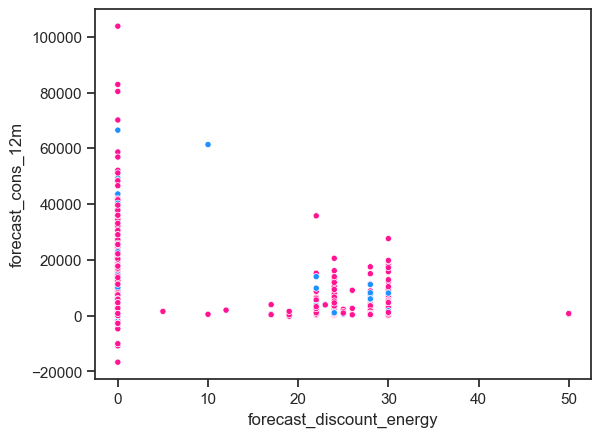

In [156]:
# Creating the scatter plot
colors = df['churn'].map({1: 'dodgerblue', 0: 'deeppink'})
ax = df.plot.scatter(x='forecast_discount_energy', y='forecast_cons_12m', c = colors, edgecolors='w', linewidth=0.5)

# Showing the chart
plt.show()

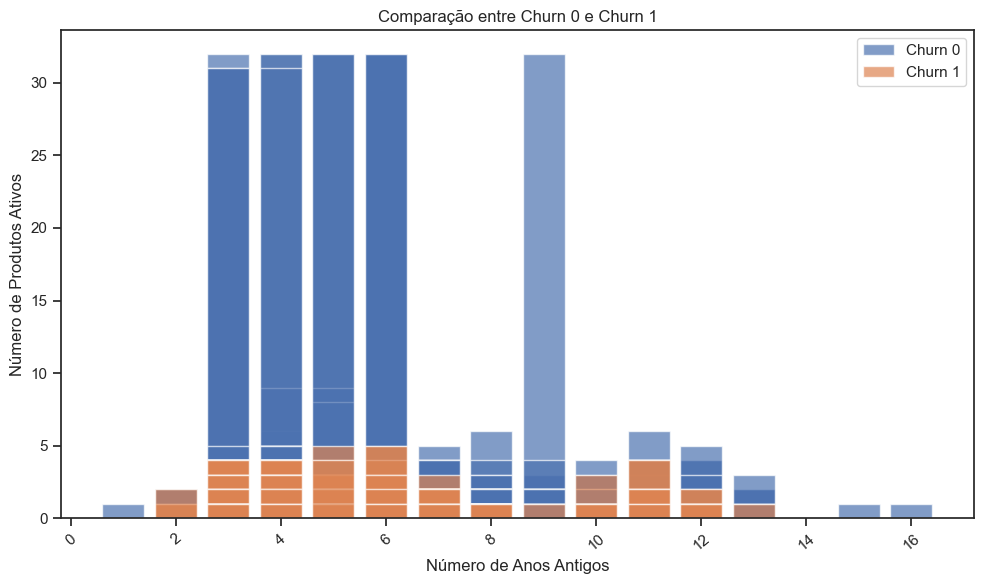

In [157]:
churn0= df[df['churn'] == 0]
churn1= df[df['churn'] == 1]
plt.figure(figsize=(10, 6))
plt.bar(churn0['num_years_antig'], churn0['nb_prod_act'], label='Churn 0', alpha=0.7)
plt.bar(churn1['num_years_antig'], churn1['nb_prod_act'], label='Churn 1', alpha=0.7)
plt.xlabel('Número de Anos Antigos')
plt.ylabel('Número de Produtos Ativos')
plt.title('Comparação entre Churn 0 e Churn 1')
plt.xticks(rotation=40)
plt.legend()

plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x23b925a4d90>,
 [Text(-1.0471265342351048, 0.3369362273498919, '0'),
  Text(1.0471265184619805, -0.33693627636942247, '1')],
 [Text(-0.5711599277646026, 0.18378339673630467, '90.1%'),
  Text(0.5711599191610802, -0.1837834234742304, '9.9%')])

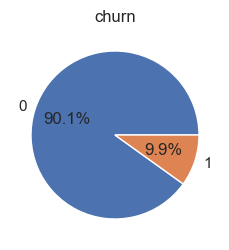

In [158]:
sizes = df['churn'].value_counts(sort = True)
labels = np.unique(df.churn)
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Feature Engineering

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   channel_sales             11878 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  datetime64[ns]
 7   date_end                  16096 non-null  datetime64[ns]
 8   date_modif_prod           16096 non-null  datetime64[ns]
 9   date_renewal              16096 non-null  datetime64[ns]
 10  forecast_cons_12m         16096 non-null  float64       
 11  forecast_cons_year        16096 non-null  int64         
 12  forecast_discount_

In [160]:
df = df[~df.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)]

In [161]:
mean_year = price.groupby(["id"]).mean().reset_index()

In [162]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
 "price_p2_var": "mean_year_price_p2_var",
"price_p3_var": "mean_year_price_p3_var",
"price_p1_fix": "mean_year_price_p1_fix",
"price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [163]:
features = mean_year

In [164]:
features.head(3)

,id,price_date,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,2021-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,000381698491fec6983d55828fe5ada6,2021-06-16 12:00:00,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996,59.156932,36.508290,8.417134
2,0004351ebdd665e6ee664792efc4fd13,2021-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000


In [165]:
features.shape

(20120, 11)

In [166]:
df["tenure"] = ((df["date_end"]-df["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\2297298973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tenure"] = ((df["date_end"]-df["date_activ"])/ np.timedelta64(1, "Y")).astype(int)


In [167]:
def convert_months(reference_date, dataframe, column):
 """
 Input a column with timedeltas and return months
 """
 time_delta = REFERENCE_DATE - dataframe[column]
 months = (time_delta / np.timedelta64(1, "M")).astype(int)
 return months

In [168]:
from datetime import datetime

REFERENCE_DATE = datetime(2022, 1, 1)

In [169]:
df["months_activ"] = convert_months(REFERENCE_DATE, df, "date_activ")
df["months_to_end"] = -convert_months(REFERENCE_DATE, df, "date_end")
df["months_modif_prod"] = convert_months(REFERENCE_DATE, df, "date_modif_prod")
df["months_renewal"] = convert_months(REFERENCE_DATE, df, "date_renewal")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\272610847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["months_activ"] = convert_months(REFERENCE_DATE, df, "date_activ")
C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\272610847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["months_to_end"] = -convert_months(REFERENCE_DATE, df, "date_end")
C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\272610847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [170]:
df.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\185484969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)


In [171]:
df.head(3)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,net_margin,num_years_antig,origin_up,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,...,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,3,30,5,1,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,189.95,0,0.0,16.27,...,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,7,75,7,75,75
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,...,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6,67,3,67,67


Separate columns into quarters

In [172]:
tenure = df[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

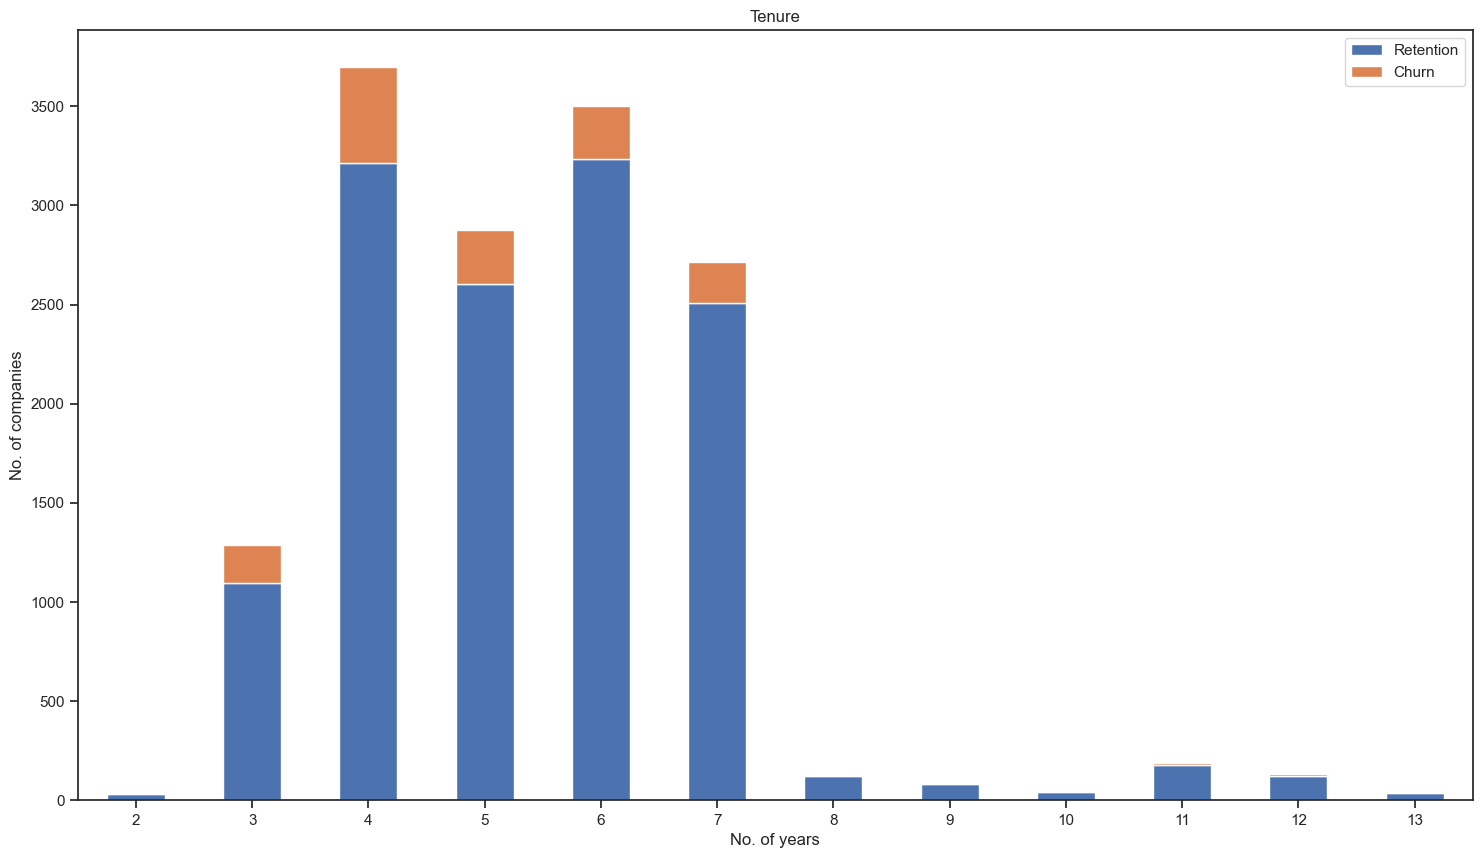

In [173]:
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

In [174]:
df["has_gas"]=df["has_gas"].replace(["t", "f"],[1,0])


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\4086029269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_gas"]=df["has_gas"].replace(["t", "f"],[1,0])


It appears that medium-term contracts have the most churn by far...

Calculating the deviation between last month bill and last 12 months average:

In [175]:
df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\817011021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']


Calculate the ratio of last 12month consumption to next 12 month forecasted consumption:

In [176]:
def handleInf(x):
    if x==float('-inf') or x==float('inf'):
        return 0

In [177]:
df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
df.cons_pattern = df.cons_pattern.apply(handleInf)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\1339534947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\1339534947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cons_pattern = df.cons_pattern.apply(handleInf)


In [178]:
df["channel_sales"] = df["channel_sales"].fillna("null_values_channel")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\1007809069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["channel_sales"] = df["channel_sales"].fillna("null_values_channel")


In [179]:
categories_channel = pd.get_dummies(df["channel_sales"], prefix = "channel")

In [180]:
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [181]:
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False
6,False,False,False,False,False,True,False,False


In [182]:
categories_channel.drop(columns=["channel_nul"],inplace=True)

In [183]:
df["origin_up"] = df["origin_up"].fillna("null_values_origin")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\475011080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["origin_up"] = df["origin_up"].fillna("null_values_origin")


In [184]:
df["origin_up"] = df["origin_up"].astype("category")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\1486737530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["origin_up"] = df["origin_up"].astype("category")


In [185]:
categories_origin = pd.get_dummies(df["origin_up"], prefix = "origin")

In [186]:
categories_origin.head(5)

,origin_ewxeelcelemmiwuafmddpobolfuxioce,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,origin_null_values_origin,origin_usapbepcfoloekilkwsdiboslwaxobdp
1,False,False,False,True,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
6,False,True,False,False,False,False


In [187]:
categories_origin.drop(columns=["origin_null_values_origin"],inplace=True)

In [188]:
df["activity_new"] = df["activity_new"].fillna("null_values_activity")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\529117955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["activity_new"] = df["activity_new"].fillna("null_values_activity")


In [189]:
categories_activity = pd.DataFrame({"Activity samples": df["activity_new"].value_counts()})
categories_activity

,Activity samples
activity_new,
null_values_activity,9039
apdekpcbwosbxepsfxclislboipuxpop,1352
kkklcdamwfafdcfwofuscwfwadblfmce,407
fmwdwsxillemwbbwelxsampiuwwpcdcb,203
kwuslieomapmswolewpobpplkaooaaew,182
...,...
waixukdfidxusmdwibmxxkkxbbmbslbf,1
cacmeipkxxdoewfsobspoooxwokpboup,1
ocskiadudoffubcmbomoslkcddxwfsuf,1


In [190]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
df["activity_new"]=df["activity_new"].replace(to_replace,"null_values_activity")

C:\Users\Inteli\AppData\Local\Temp\ipykernel_20540\1386955933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["activity_new"]=df["activity_new"].replace(to_replace,"null_values_activity")


In [191]:
# Create dummy variables
categories_activity = pd.get_dummies(df["activity_new"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]


In [192]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,True,False,False


In [193]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

In [194]:
# Use common index to merge
df = pd.merge(df, categories_channel, left_index=True, right_index=True)
df = pd.merge(df, categories_origin, left_index=True, right_index=True)
df = pd.merge(df, categories_activity, left_index=True, right_index=True)

In [195]:
df.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

In [196]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,bill_dev,cons_pattern
count,1.473500e+04,1.473500e+04,14735.000000,14735.000000,14735.000000,14617.000000,14735.000000,14617.000000,14617.000000,14617.000000,...,14735.000000,14732.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,17.0
mean,1.604489e+05,2.855284e+04,16169.710553,1877.770104,1408.358941,0.967504,63.104111,0.137275,0.050510,43.131788,...,4.995792,18.211753,0.099287,5.398371,57.528537,6.229793,34.759009,34.759009,-2798.965264,0.0
std,5.756891e+05,1.695069e+05,64395.828783,2452.390546,3286.228087,5.109392,66.448173,0.024625,0.049034,4.488484,...,1.611680,14.317683,0.299058,1.663075,19.011220,3.455293,29.743505,29.743505,21622.043423,0.0
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.300000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000,-449656.000000,0.0
25%,5.677500e+03,0.000000e+00,0.000000,494.555000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,4.000000,12.500000,0.000000,4.000000,43.000000,3.000000,6.000000,6.000000,-499.458333,0.0
50%,1.413900e+04,0.000000e+00,794.000000,1112.100000,317.000000,0.000000,18.800000,0.143166,0.084138,44.311378,...,5.000000,13.856000,0.000000,5.000000,56.000000,6.000000,29.000000,29.000000,104.750000,0.0
75%,4.091400e+04,0.000000e+00,3393.500000,2405.010000,1752.000000,0.000000,131.020000,0.146348,0.098837,44.311378,...,6.000000,19.292500,0.000000,6.000000,70.000000,9.000000,63.000000,63.000000,758.750000,0.0
max,6.207104e+06,4.188440e+06,771203.000000,82902.830000,175375.000000,30.000000,641.600000,0.273963,0.195975,59.266378,...,13.000000,451.000000,1.000000,13.000000,149.000000,17.000000,149.000000,149.000000,194525.250000,0.0


In [197]:
# Remove negative values
df.loc[df.cons_12m < 0,"cons_12m"] = np.nan
df.loc[df.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
df.loc[df.cons_last_month < 0,"cons_last_month"] = np.nan
df.loc[df.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
df.loc[df.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
df.loc[df.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
df.loc[df.imp_cons < 0,"imp_cons"] = np.nan

In [198]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"]+1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"]+1)
df["cons_last_month"] = np.log10(df["cons_last_month"]+1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"]+1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"]+1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"]+1)
df["imp_cons"] = np.log10(df["imp_cons"]+1)

In [199]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,bill_dev,cons_pattern
count,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14617.000000,14735.000000,14617.000000,14617.000000,14617.000000,...,14735.000000,14732.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,17.0
mean,4.225170,0.776783,2.266817,2.961978,1.786724,0.967504,1.516157,0.137275,0.050510,43.131788,...,4.995792,18.211753,0.099287,5.398371,57.528537,6.229793,34.759009,34.759009,-2798.965264,0.0
std,0.886477,1.715576,1.770043,0.685695,1.585257,5.109392,0.572898,0.024625,0.049034,4.488484,...,1.611680,14.317683,0.299058,1.663075,19.011220,3.455293,29.743505,29.743505,21622.043423,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.300000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000,-449656.000000,0.0
25%,3.754234,0.000000,0.000000,2.695092,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,...,4.000000,12.500000,0.000000,4.000000,43.000000,3.000000,6.000000,6.000000,-499.458333,0.0
50%,4.150449,0.000000,2.900367,3.046534,2.502427,0.000000,1.296665,0.143166,0.084138,44.311378,...,5.000000,13.856000,0.000000,5.000000,56.000000,6.000000,29.000000,29.000000,104.750000,0.0
75%,4.611882,0.000000,3.530776,3.381297,3.243782,0.000000,2.120640,0.146348,0.098837,44.311378,...,6.000000,19.292500,0.000000,6.000000,70.000000,9.000000,63.000000,63.000000,758.750000,0.0
max,6.792889,6.622052,5.887169,4.918575,5.243970,30.000000,2.807941,0.273963,0.195975,59.266378,...,13.000000,451.000000,1.000000,13.000000,149.000000,17.000000,149.000000,149.000000,194525.250000,0.0


In [200]:
features.head(3)

,id,price_date,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,2021-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,000381698491fec6983d55828fe5ada6,2021-06-16 12:00:00,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996,59.156932,36.508290,8.417134
2,0004351ebdd665e6ee664792efc4fd13,2021-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000


In [201]:
features_cor = features.drop(['id', 'price_date'], axis=1)

In [202]:
correlation = features_cor.corr()

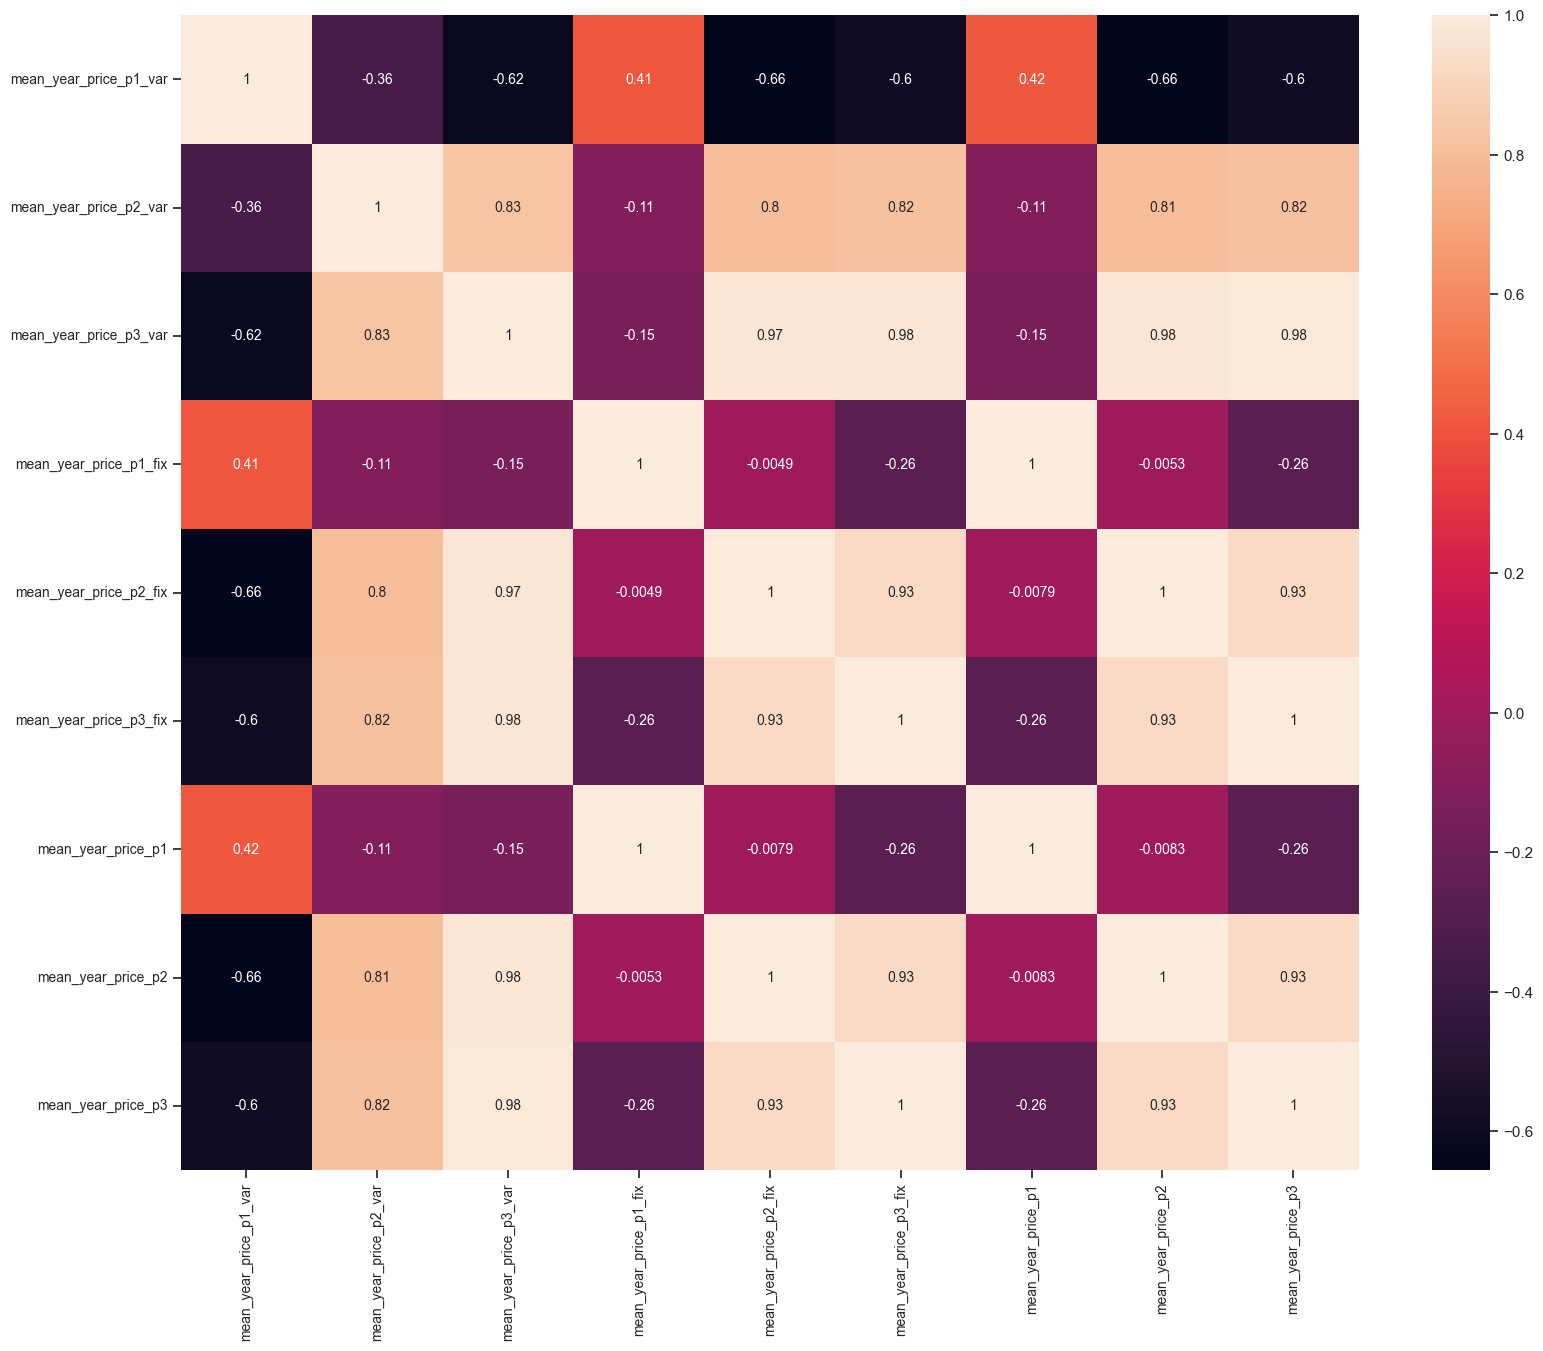

In [203]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [204]:
# Calculate correlation of variables
correlation = df.select_dtypes(include=[float, int, bool]).corr()

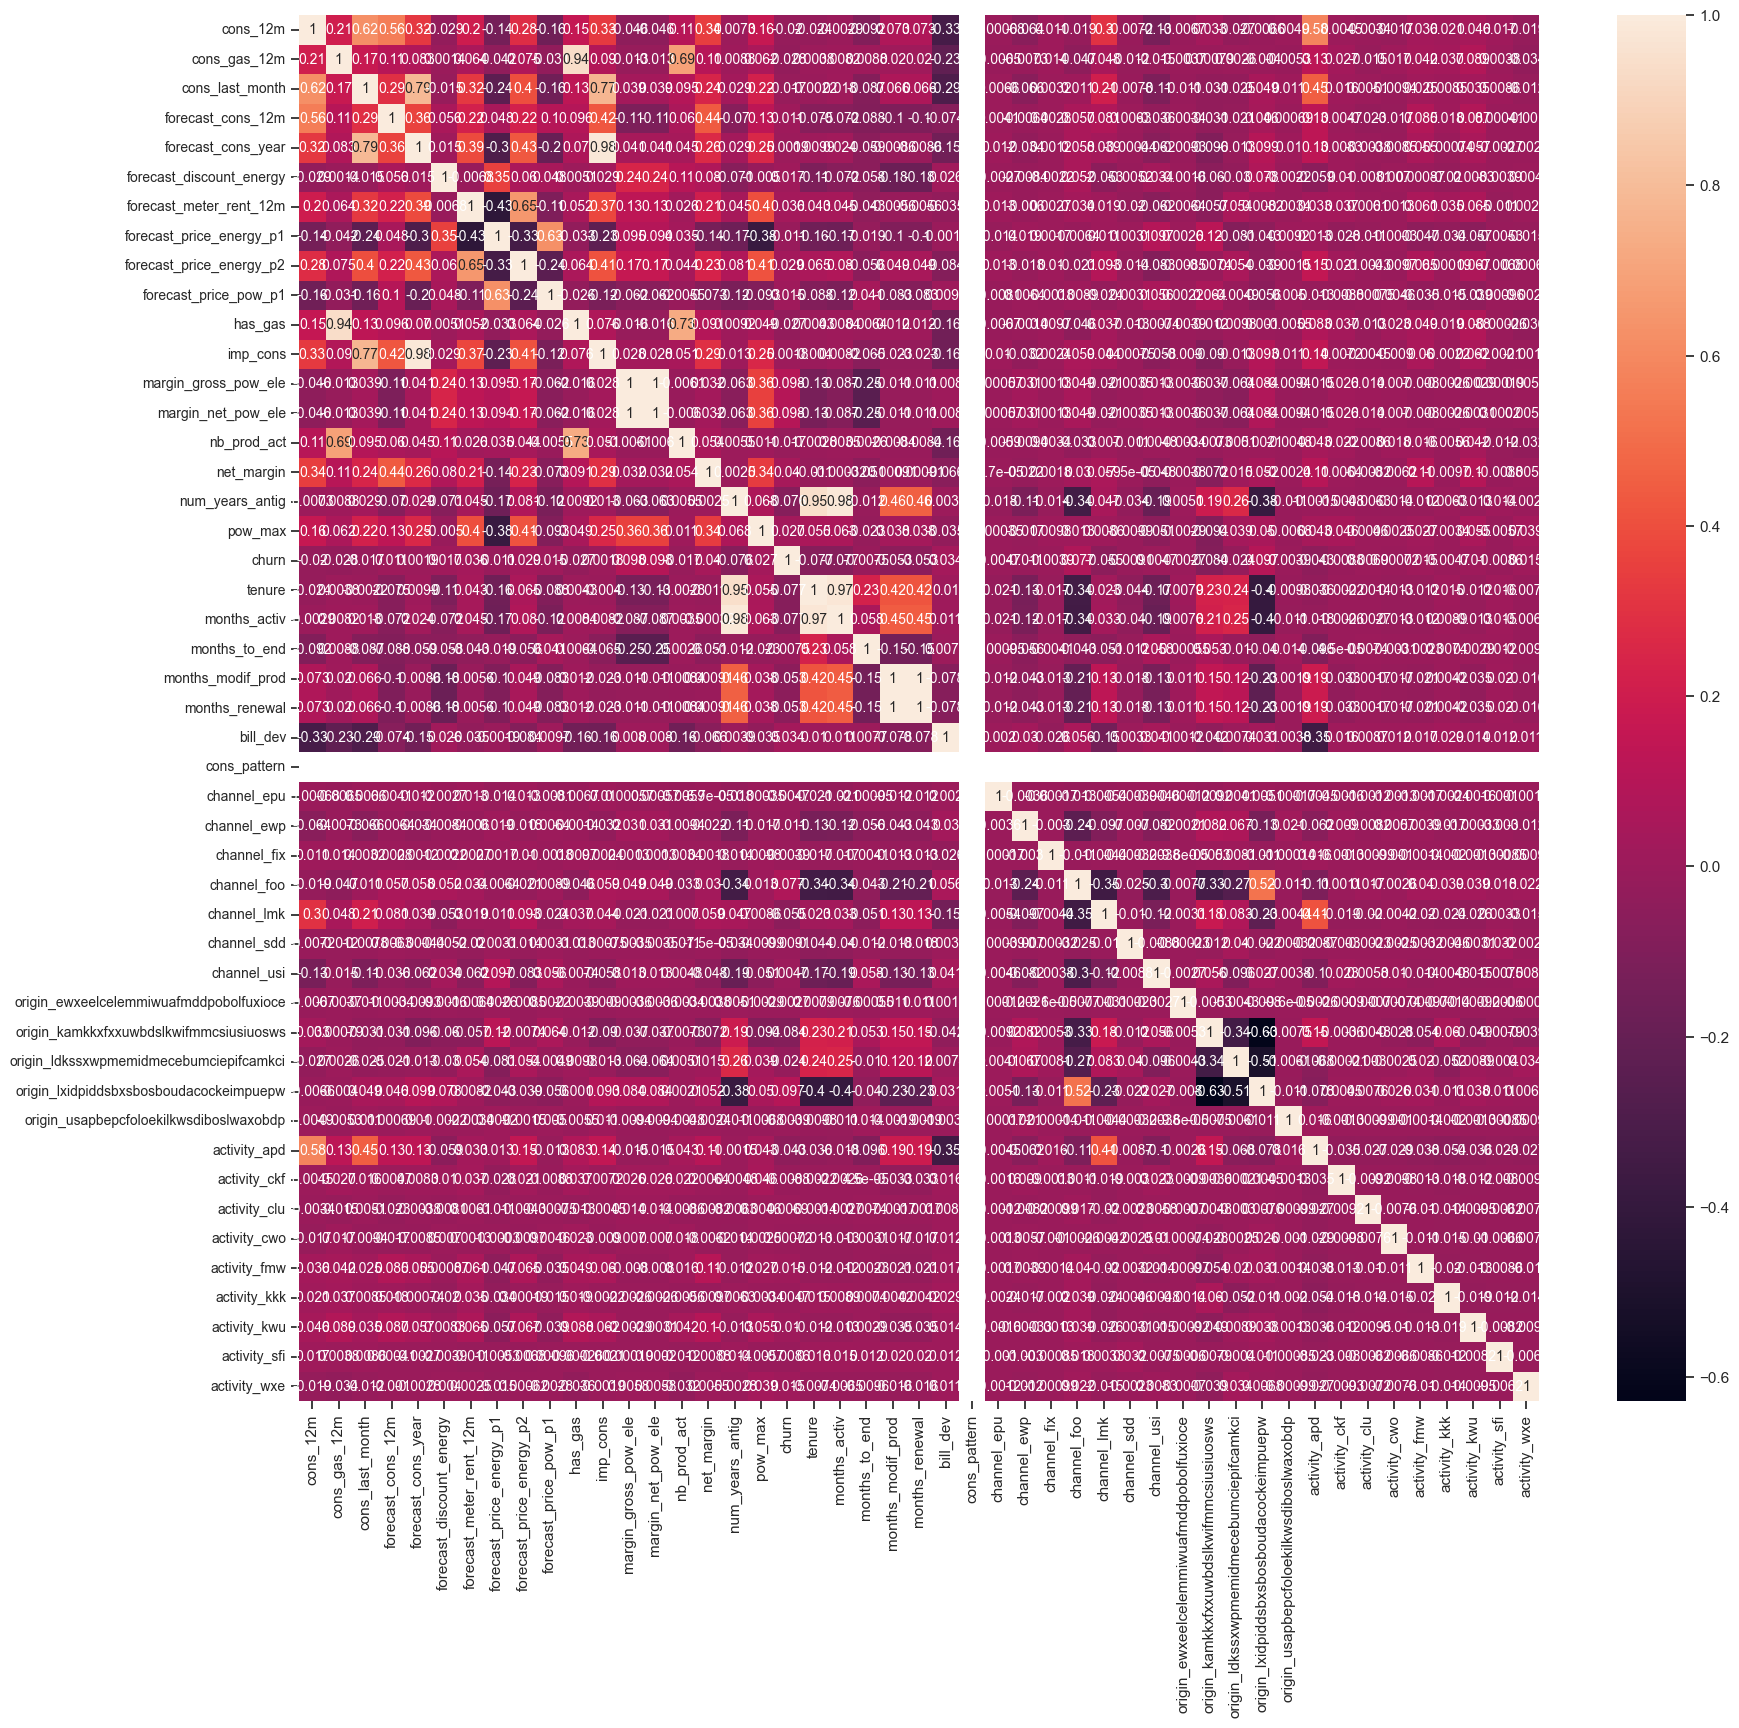

In [205]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.yticks(fontsize=10)
plt.show()

In [206]:
df.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

Removing outliers

In [207]:
def replace_outliers_z_score(dataframe, column, Z=3):
 """
 Replace outliers with the mean values using the Z score.
 Nan values are also replaced with the mean values.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 from scipy.stats import zscore
 
 df = dataframe.copy(deep=True)
 df.dropna(inplace=True, subset=[column])
 
 # Calculate mean without outliers
 df["zscore"] = zscore(df[column])
 mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
 
 # Replace with mean values
 dataframe[column] = dataframe[column].fillna(mean_)
 dataframe["zscore"] = zscore(dataframe[column])
 no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
 dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
 
 # Print message
 print("Replaced:", no_outliers, " outliers in ", column)
 return dataframe.drop(columns="zscore")


In [208]:
features.head(5)

,id,price_date,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,2021-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,000381698491fec6983d55828fe5ada6,2021-06-16 12:00:00,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996,59.156932,36.508290,8.417134
2,0004351ebdd665e6ee664792efc4fd13,2021-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
3,000861c9aa2a0784b8d83f8b5b95d010,2021-06-16 12:00:00,0.124524,0.104134,0.075021,40.661003,24.396601,16.264402,40.785527,24.500735,16.339424
4,0010bcc39e42b3c2131ed2ce55246e3c,2021-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000


In [209]:
features = features.drop(['price_date'], axis=1)

In [210]:
for c in features.columns:
 if c != "id":
   features = replace_outliers_z_score(features,c)

Replaced: 344  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 151  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 170  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [211]:
features.reset_index(drop=True, inplace=True)

In [212]:
def _find_outliers_iqr(dataframe, column):
 """
 Find outliers using the 1.5*IQR rule.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dict
 With the values of the iqr, lower_bound and upper_bound
 """
 col = sorted(dataframe[column])
 q1, q3= np.percentile(col,[25,75])
 iqr = q3 - q1
 lower_bound = q1 -(1.5 * iqr) 
 upper_bound = q3 +(1.5 * iqr)
 results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
 return results
def remove_outliers_iqr(dataframe, column):
 """
 Remove outliers using the 1.5*IQR rule.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 
 outliers = _find_outliers_iqr(dataframe, column)
 removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
 (dataframe[column] > outliers["upper_bound"])].shape
 
 dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
 (dataframe[column] < outliers["upper_bound"])]
 print("Removed:", removed[0], " outliers")
 return dataframe
def remove_outliers_z_score(dataframe, column, Z=3):
 """
 Remove outliers using the Z score. Values with more than 3 are removed.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 from scipy.stats import zscore
 
 dataframe["zscore"] = zscore(dataframe[column])
 
 removed = dataframe[(dataframe["zscore"] < -Z) |
 (dataframe["zscore"] > Z)].shape
 
 dataframe = dataframe[(dataframe["zscore"] > -Z) &
 (dataframe["zscore"] < Z)]
 
 print("Removed:", removed[0], " outliers of ", column)
 
 return dataframe.drop(columns="zscore")

def replace_outliers_z_score(dataframe, column, Z=3):
 """
 Replace outliers with the mean values using the Z score.
 Nan values are also replaced with the mean values.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column 
 
 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """
 from scipy.stats import zscore
 
 df = dataframe.copy(deep=True)
 df.dropna(inplace=True, subset=[column])
 
 # Calculate mean without outliers
 df["zscore"] = zscore(df[column])
 mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
 
 # Replace with mean values
 no_outliers = dataframe[column].isnull().sum()
 dataframe[column] = dataframe[column].fillna(mean_)
 dataframe["zscore"] = zscore(dataframe[column])
 dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
 
 # Print message
 print("Replaced:", no_outliers, " outliers in ", column)
 return dataframe.drop(columns="zscore")


In [213]:
df = replace_outliers_z_score(df,"cons_12m")
df = replace_outliers_z_score(df,"cons_gas_12m")
df = replace_outliers_z_score(df,"cons_last_month")
df = replace_outliers_z_score(df,"forecast_cons_12m")
df = replace_outliers_z_score(df,"forecast_discount_energy")
df = replace_outliers_z_score(df,"forecast_meter_rent_12m")
df = replace_outliers_z_score(df,"forecast_price_energy_p1")
df = replace_outliers_z_score(df,"forecast_price_energy_p2")
df = replace_outliers_z_score(df,"forecast_price_pow_p1")
df = replace_outliers_z_score(df,"imp_cons")
df = replace_outliers_z_score(df,"margin_gross_pow_ele")
df = replace_outliers_z_score(df,"margin_net_pow_ele")
df = replace_outliers_z_score(df,"net_margin")
df = replace_outliers_z_score(df,"pow_max")
df = replace_outliers_z_score(df,"months_activ")
df = replace_outliers_z_score(df,"months_to_end")
df = replace_outliers_z_score(df,"months_modif_prod")
df = replace_outliers_z_score(df,"months_renewal")

Replaced: 0  outliers in  cons_12m
Replaced: 0  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 0  outliers in  forecast_cons_12m
Replaced: 118  outliers in  forecast_discount_energy
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 118  outliers in  forecast_price_energy_p1
Replaced: 118  outliers in  forecast_price_energy_p2
Replaced: 118  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  imp_cons
Replaced: 10  outliers in  margin_gross_pow_ele
Replaced: 10  outliers in  margin_net_pow_ele
Replaced: 12  outliers in  net_margin
Replaced: 3  outliers in  pow_max
Replaced: 0  outliers in  months_activ
Replaced: 0  outliers in  months_to_end
Replaced: 0  outliers in  months_modif_prod
Replaced: 0  outliers in  months_renewal


In [214]:
df.reset_index(drop=True, inplace=True)

In [215]:
features.head(2)

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,000381698491fec6983d55828fe5ada6,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996,59.156932,36.508290,8.417134


In [216]:
df.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_usapbepcfoloekilkwsdiboslwaxobdp,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,24011ae4ebbe3035111d65fa7c15bc57,4.269617,4.739944,0.0,3.042185,0.0,0.444045,0.114481,0.098142,40.606701,...,False,False,False,False,False,False,False,False,False,False
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,False,False,False,False,False,False,False,False,False,False


In [217]:
df.shape

(14735, 46)

In [218]:
train = pd.merge(df, features, on="id")

In [219]:
train.shape

(14735, 55)

In [220]:
train.isna().sum()

id                                             0
cons_12m                                       0
cons_gas_12m                                   0
cons_last_month                                0
forecast_cons_12m                              0
forecast_discount_energy                       0
forecast_meter_rent_12m                        0
forecast_price_energy_p1                       0
forecast_price_energy_p2                       0
forecast_price_pow_p1                          0
has_gas                                        0
imp_cons                                       0
margin_gross_pow_ele                           0
margin_net_pow_ele                             0
nb_prod_act                                    0
net_margin                                     0
pow_max                                        0
churn                                          0
tenure                                         0
months_activ                                   0
months_to_end       

In [221]:
train = train.drop(['cons_pattern'], axis=1)

# Modeling & Evaluation

In [222]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_discount_energy
6,forecast_meter_rent_12m
7,forecast_price_energy_p1
8,forecast_price_energy_p2
9,forecast_price_pow_p1


In [223]:
y = train["churn"]
X = train.drop(labels = ["id","churn"],axis = 1)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## XGBOOST

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy (XGBoost): 0.90
Precision (XGBoost): 0.63
Recall (XGBoost): 0.13
F1 Score (XGBoost): 0.22
ROC AUC (XGBoost): 0.67


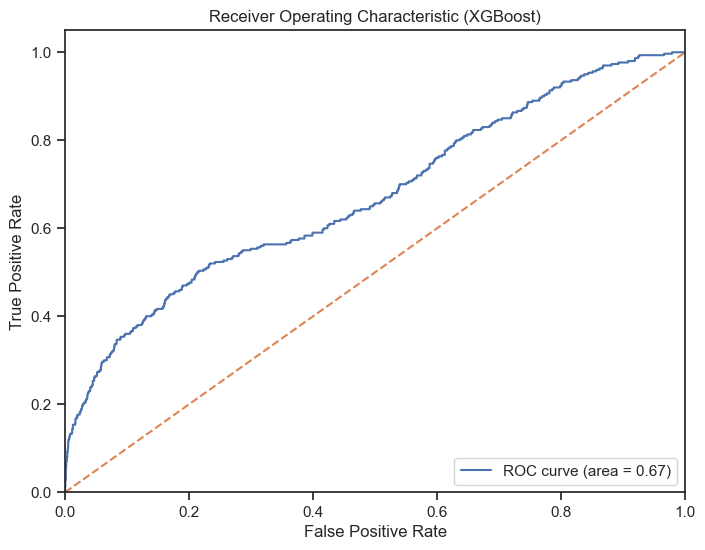

In [225]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create and fit the model
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)

# Predict the labels
y_pred_xgboost = xgboost.predict(X_test)
y_prob_xgboost = xgboost.predict_proba(X_test)[:, 1]  # Predicted probability of the positive class

# Calculate metrics
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, y_prob_xgboost)

# Print the metrics
print(f'Accuracy (XGBoost): {accuracy_xgboost:.2f}')
print(f'Precision (XGBoost): {precision_xgboost:.2f}')
print(f'Recall (XGBoost): {recall_xgboost:.2f}')
print(f'F1 Score (XGBoost): {f1_xgboost:.2f}')
print(f'ROC AUC (XGBoost): {roc_auc_xgboost:.2f}')

# Plot ROC Curve
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_prob_xgboost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost, tpr_xgboost, label=f'ROC curve (area = {roc_auc_xgboost:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

## Random Forest

Accuracy (Random Forest): 0.90
Precision (Random Forest): 1.00
Recall (Random Forest): 0.06
F1 Score (Random Forest): 0.11
ROC AUC (Random Forest): 0.71


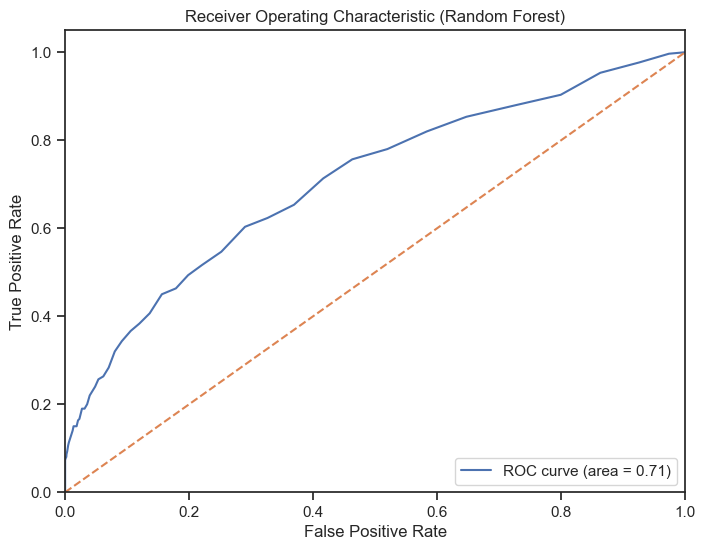

In [226]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict the labels and the probabilities
y_pred_randomforest = random_forest.predict(X_test)
y_prob_randomforest = random_forest.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate metrics
accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
precision_randomforest = precision_score(y_test, y_pred_randomforest)
recall_randomforest = recall_score(y_test, y_pred_randomforest)
f1_randomforest = f1_score(y_test, y_pred_randomforest)
roc_auc_randomforest = roc_auc_score(y_test, y_prob_randomforest)

# Print the metrics
print(f'Accuracy (Random Forest): {accuracy_randomforest:.2f}')
print(f'Precision (Random Forest): {precision_randomforest:.2f}')
print(f'Recall (Random Forest): {recall_randomforest:.2f}')
print(f'F1 Score (Random Forest): {f1_randomforest:.2f}')
print(f'ROC AUC (Random Forest): {roc_auc_randomforest:.2f}')

# Plot ROC Curve
fpr_randomforest, tpr_randomforest, _ = roc_curve(y_test, y_prob_randomforest)
plt.figure(figsize=(8, 6))
plt.plot(fpr_randomforest, tpr_randomforest, label=f'ROC curve (area = {roc_auc_randomforest:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

## CatBoost

In [227]:
! pip install catboost

In [229]:
from catboost import CatBoostClassifier

# Create and fit the model
catboost = CatBoostClassifier(logging_level='Silent')  # Suppressing the training output
catboost.fit(X_train, y_train)

# Predict the labels
y_pred_catboost = catboost.predict(X_test)
y_prob_catboost = catboost.predict_proba(X_test)[:, 1]  # Predicted probability of the positive class

# Calculate metrics
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, y_prob_catboost)

# Print the metrics
print(f'Accuracy (CatBoost): {accuracy_catboost:.2f}')
print(f'Precision (CatBoost): {precision_catboost:.2f}')
print(f'Recall (CatBoost): {recall_catboost:.2f}')
print(f'F1 Score (CatBoost): {f1_catboost:.2f}')
print(f'ROC AUC (CatBoost): {roc_auc_catboost:.2f}')

# Plot ROC Curve
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_prob_catboost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, label=f'ROC curve (area = {roc_auc_catboost:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CatBoost)')
plt.legend(loc="lower right")
plt.show()


ModuleNotFoundError: No module named 'catboost'

## Using Optuna in the XGBOOST

In [ ]:
! pip install optuna

ERROR: Could not install packages due to an OSError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'C:\\Python311\\Scripts\\alembic.exe' -> 'C:\\Python311\\Scripts\\alembic.exe.deleteme'




  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/69/60/87a06ef66b34cbe2f2eb0ab66f003664404a7f40c21403a69fad7e28a82b/optuna-3.3.0-py3-none-any.whl.metadata
  Using cached optuna-3.3.0-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/a2/8b/46919127496036c8e990b2b236454a0d8655fd46e1df2fd35610a9cbc842/alembic-1.12.0-py3-none-any.whl.metadata
  Using cached alembic-1.12.0-py3-none-any.whl.metadata (7.2 kB)
Using cached optuna-3.3.0-py3-none-any.whl (404 kB)
Using cached alembic-1.12.0-py3-none-any.whl (226 kB)


In [ ]:
pip show optuna

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna

ModuleNotFoundError: No module named 'optuna'

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna

# ... [Code to generate your dataset and split it into training and test sets]

# Basic XGBoost Model
xgboost_basic = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_basic.fit(X_train, y_train)
y_pred_basic = xgboost_basic.predict(X_test)
y_prob_basic = xgboost_basic.predict_proba(X_test)[:, 1]  

accuracy_basic = accuracy_score(y_test, y_pred_basic)
roc_auc_basic = roc_auc_score(y_test, y_prob_basic)

# Optuna Optimization
def objective(trial):
    param = {
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
    }
    
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    y_pred_opt = model.predict(X_test)
    y_prob_opt = model.predict_proba(X_test)[:, 1]  
    return roc_auc_score(y_test, y_prob_opt)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best XGBoost Model
best_params = study.best_params
xgboost_best = xgb.XGBClassifier(**best_params)
xgboost_best.fit(X_train, y_train)
y_pred_best = xgboost_best.predict(X_test)
y_prob_best = xgboost_best.predict_proba(X_test)[:, 1]  

accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)

# Compare Basic and Best Model
print(f'Basic Model - Accuracy: {accuracy_basic:.2f}, ROC AUC: {roc_auc_basic:.2f}')
print(f'Best Model - Accuracy: {accuracy_best:.2f}, ROC AUC: {roc_auc_best:.2f}')

# ROC Curve Comparison
plt.figure(figsize=(8, 6))
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr_basic, tpr_basic, label=f'Basic Model (AUC = {roc_auc_basic:.2f})')
plt.plot(fpr_best, tpr_best, label=f'Best Model (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ModuleNotFoundError: No module named 'optuna'